In [212]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [213]:
data_folder = './data/'

#population size per state
population_size_state=pd.read_csv(data_folder+"population_size_state.csv", sep=';')
population_size_state.drop(['2015', '2016', '2017', '2018', '2019', '2020'], axis=1,inplace=True)
population_size_state=population_size_state.rename(columns={'Unnamed: 0':'States', "2015.1": "2015", "2016.1": "2016", "2017.1": "2017", "2018.1": "2018", "2019.1": "2019", "2020.1": "2020"})
population_size_state=population_size_state.set_index(['States'])

#area per state
area_state=pd.read_csv(data_folder+"area_state.csv", sep=";").rename(columns={"State": "state"})
area_state=area_state.set_index(['state'])

#quotations data for 2015
merged2015=pd.read_csv(data_folder+"merged2015.csv", sep=";")
merged2015=pd.DataFrame(merged2015.groupby("state")['numOccurrences'].sum())

#quotations data for 2016
merged2016=pd.read_csv(data_folder+"merged2016.csv", sep=";")
merged2016=pd.DataFrame(merged2015.groupby("state")['numOccurrences'].sum())

#quotations data for 2017
merged2017=pd.read_csv(data_folder+"merged2017.csv", sep=";")
merged2017=pd.DataFrame(merged2015.groupby("state")['numOccurrences'].sum())

#quotations data for 2018
merged2018=pd.read_csv(data_folder+"merged2018.csv", sep=";")
merged2018=pd.DataFrame(merged2015.groupby("state")['numOccurrences'].sum())

#quotations data for 2019
merged2019=pd.read_csv(data_folder+"merged2019.csv", sep=";")
merged2019=pd.DataFrame(merged2015.groupby("state")['numOccurrences'].sum())

#quotations data for 2020
merged2020=pd.read_csv(data_folder+"merged2020.csv", sep=";")
merged2020=pd.DataFrame(merged2015.groupby("state")['numOccurrences'].sum())


In the following section, we get the weights, based on population size, by the use of normalization:

In [214]:
#normalization:
population_size_state.astype(float)
population_size_state=(population_size_state-population_size_state.mean())/population_size_state.std()
population_size_state.sample(5)

,2015,2016,2017,2018,2019,2020
States,,,,,,
Connecticut,-0.376553,-0.380782,-0.384185,-0.386858,-0.390504,-0.393686
New Hampshire,-0.690447,-0.689859,-0.689506,-0.689830,-0.690368,-0.690731
Vermont,-0.789683,-0.789284,-0.789032,-0.789514,-0.790548,-0.791466
Michigan,0.508331,0.500268,0.494267,0.488508,0.482308,0.475396
Rhode Island,-0.729573,-0.729373,-0.729829,-0.730198,-0.731519,-0.732649


In the following section, we get the weights, based on area per state, by the use of normalization:

In [215]:
#normalization:
area_state.astype(float)
area_state=(area_state-area_state.mean())/area_state.std()
area_state.sample(5)

,Sq Miles
state,
Colorado,0.348042
Kansas,0.127049
Illinois,-0.119776
Louisiana,-0.175847
South Dakota,0.074747


## Normalization with respect to the population size per state:

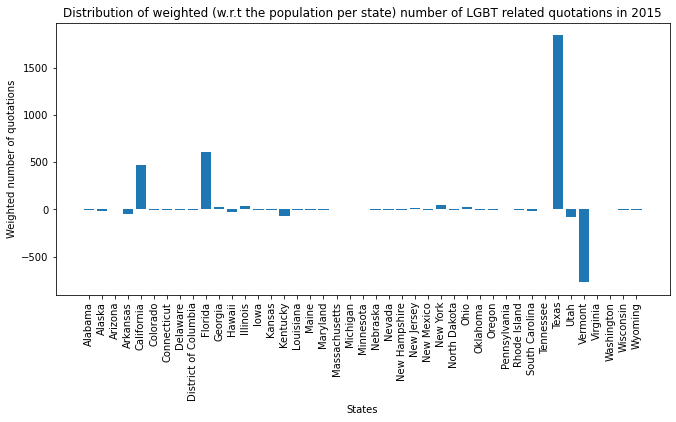

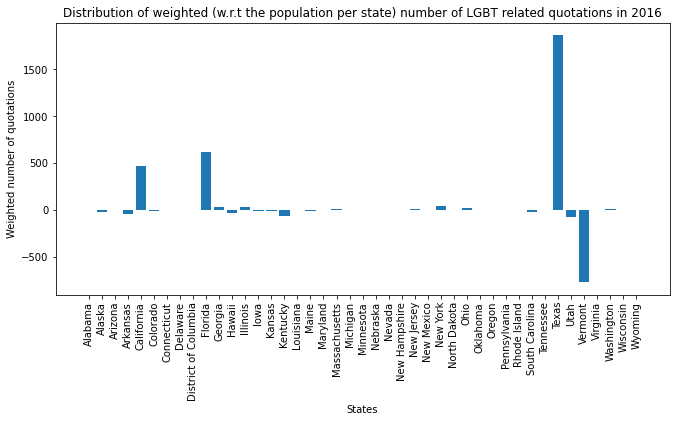

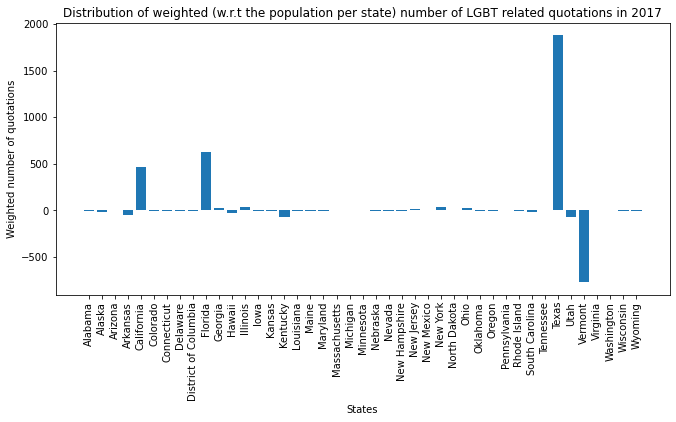

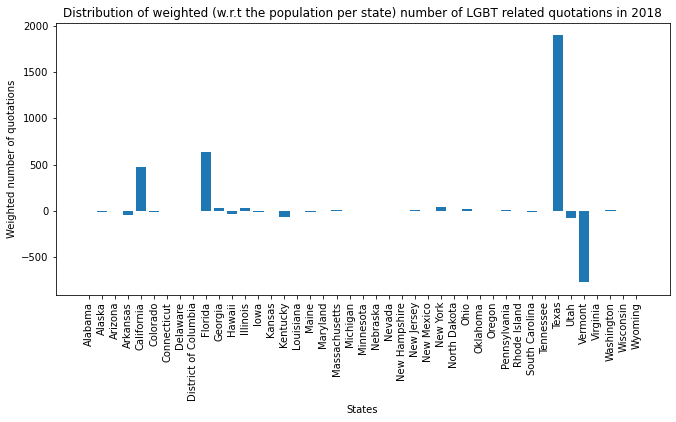

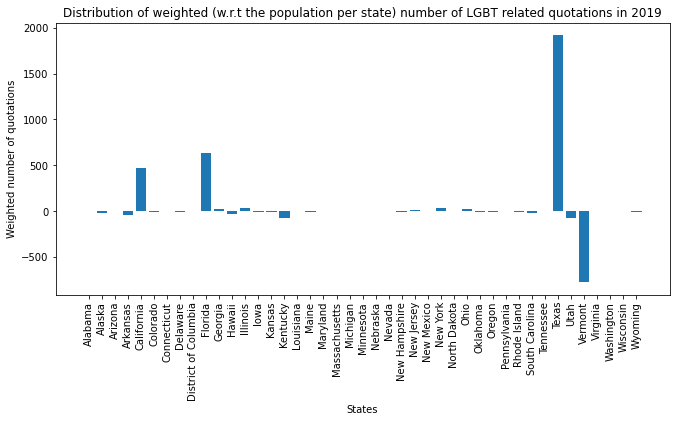

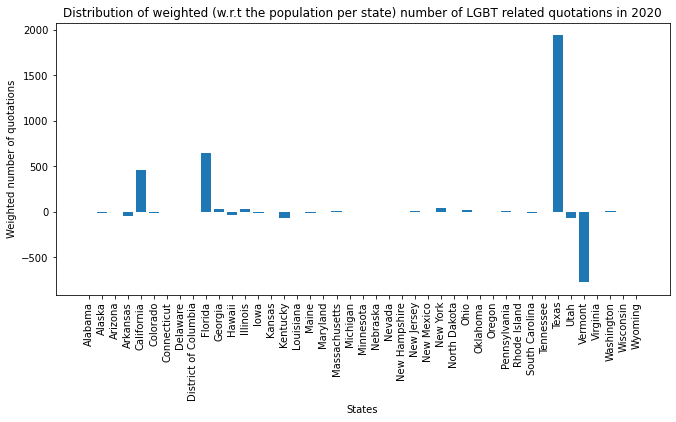

In [216]:
#prepare data for the weighted number of occurrences for each year:
population_size_state_2015=population_size_state['2015']
population_size_state_2016=population_size_state['2016']
population_size_state_2017=population_size_state['2017']
population_size_state_2018=population_size_state['2018']
population_size_state_2019=population_size_state['2019']
population_size_state_2020=population_size_state['2020']


weight2015=pd.merge(population_size_state_2015,merged2015,left_index=True, right_index=True)
weight2016=pd.merge(population_size_state_2016,merged2016,left_index=True, right_index=True)
weight2017=pd.merge(population_size_state_2017,merged2017,left_index=True, right_index=True)
weight2018=pd.merge(population_size_state_2018,merged2018,left_index=True, right_index=True)
weight2019=pd.merge(population_size_state_2019,merged2019,left_index=True, right_index=True)
weight2020=pd.merge(population_size_state_2020,merged2020,left_index=True, right_index=True)

#weighted number of occurrences:

##2015
weight2015['weighted_numOccurrences']=weight2015['2015']*weight2015['numOccurrences']
plt.figure(figsize=(11,5))
plt.bar(weight2015.index, weight2015.weighted_numOccurrences)
plt.xlabel('States')
plt.ylabel('Weighted number of quotations')
plt.title('Distribution of weighted (w.r.t the population per state) number of LGBT related quotations in 2015')
plt.xticks(rotation = 90)
plt.show()

##2016
weight2016['weighted_numOccurrences']=weight2016['2016']*weight2016['numOccurrences']
plt.figure(figsize=(11,5))
plt.bar(weight2016.index, weight2016.weighted_numOccurrences)
plt.xlabel('States')
plt.ylabel('Weighted number of quotations')
plt.title('Distribution of weighted (w.r.t the population per state) number of LGBT related quotations in 2016')
plt.xticks(rotation = 90)
plt.show()

##2017
weight2017['weighted_numOccurrences']=weight2017['2017']*weight2017['numOccurrences']
plt.figure(figsize=(11,5))
plt.bar(weight2017.index, weight2017.weighted_numOccurrences)
plt.xlabel('States')
plt.ylabel('Weighted number of quotations')
plt.title('Distribution of weighted (w.r.t the population per state) number of LGBT related quotations in 2017')
plt.xticks(rotation = 90)
plt.show()

##2018
weight2018['weighted_numOccurrences']=weight2018['2018']*weight2018['numOccurrences']
plt.figure(figsize=(11,5))
plt.bar(weight2018.index, weight2018.weighted_numOccurrences)
plt.xlabel('States')
plt.ylabel('Weighted number of quotations')
plt.title('Distribution of weighted (w.r.t the population per state) number of LGBT related quotations in 2018')
plt.xticks(rotation = 90)
plt.show()

##2019
weight2019['weighted_numOccurrences']=weight2019['2019']*weight2019['numOccurrences']
plt.figure(figsize=(11,5))
plt.bar(weight2019.index, weight2019.weighted_numOccurrences)
plt.xlabel('States')
plt.ylabel('Weighted number of quotations')
plt.title('Distribution of weighted (w.r.t the population per state) number of LGBT related quotations in 2019')
plt.xticks(rotation = 90)
plt.show()

##2020
weight2020['weighted_numOccurrences']=weight2020['2020']*weight2020['numOccurrences']
plt.figure(figsize=(11,5))
plt.bar(weight2020.index, weight2020.weighted_numOccurrences)
plt.xlabel('States')
plt.ylabel('Weighted number of quotations')
plt.title('Distribution of weighted (w.r.t the population per state) number of LGBT related quotations in 2020')
plt.xticks(rotation = 90)
plt.show()

## Normalization with respect to the area per state

In [217]:
#pre-processing step to have the same kind of indices in both area_state and merged2015:
idx_list2=[]
for idx,rows in area_state.iterrows():
    idx=idx.replace('\xa0','')
    idx_list2.append(idx)
area_state.index=idx_list2

In [218]:
#create the dataframes with both merged{year} and area per state
weights_area=list()
for merged_df in merged_df_list:
    df=pd.merge(area_state,merged_df,left_index=True, right_index=True)
    weights_area.append(df)    

#weights_area for year 2015 is weights_area[0] for example:
print("Dataframe for year 2015, containing weights and the number of quotations per state:")
weights_area[0].sample(5)

Dataframe for year 2015, containing weights and the number of quotations per state:


,Sq Miles,numOccurrences
Vermont,-0.609040,980
Georgia,-0.104459,50
Texas,2.014509,625
Wisconsin,-0.042958,13
Maine,-0.348052,13


In [219]:
#Normalization:
for i in range(len(weights_area)):
    weights_area[i]['weighted_numOccurrences']=weights_area[i]['Sq Miles']*weights_area[i]['numOccurrences']

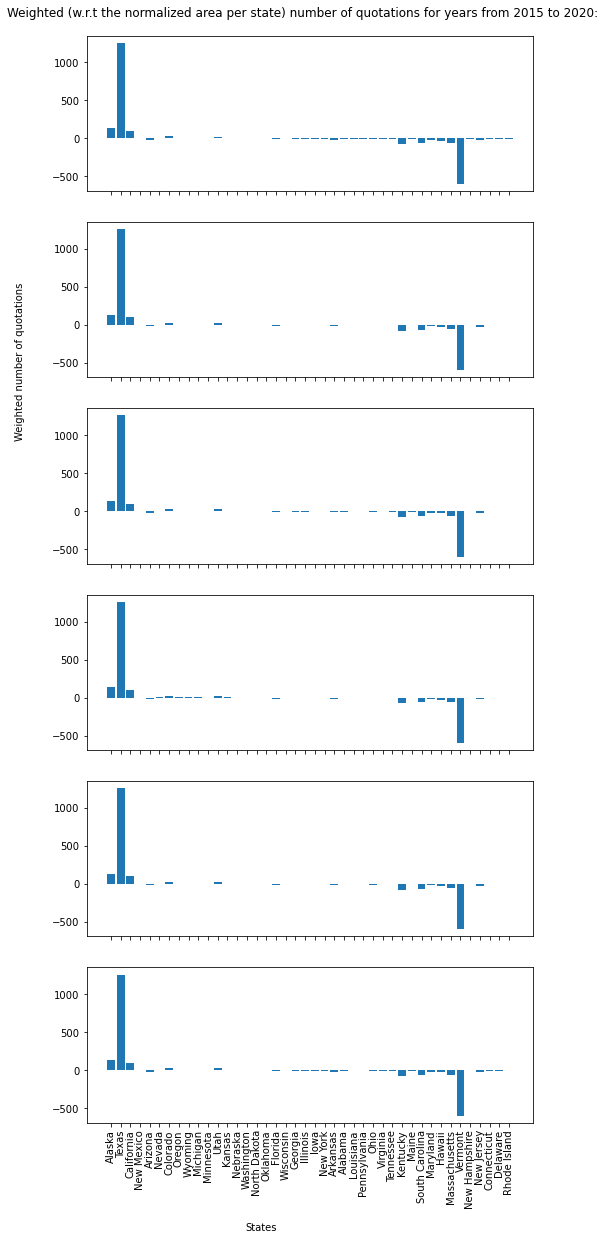

In [220]:
#Plots:
fig, axs = plt.subplots(int(len(weights_area)),1,figsize= (8,20), sharey = False, sharex = True)
for i in range(len(weights_area)):
    axs[i].bar(weights_area[i].index, weights_area[i].weighted_numOccurrences)
    plt.xticks(rotation = 90)

fig.text(0,0.6, "Weighted number of quotations", rotation = 90)  
fig.text(0.4,0.05,"States")
fig.suptitle("Weighted (w.r.t the normalized area per state) number of quotations for years from 2015 to 2020:", y=0.9)
plt.show()